Jonathan Fischer, using Julia

# Problem Set 2

In [204]:
using Random, Distributions
using Plots
# using PlotlyJS
# using StatsPlots
using DataFrames
gr()
using StatsBase
using DelimitedFiles
using LinearAlgebra
# using DataStructures
using Distances
using Symbolics
using Latexify

┌ Info: Precompiling Symbolics [0c5d862f-8b57-4792-8d23-62f2024744c7]
└ @ Base loading.jl:1423


## 1) Sampling from a Gaussian distribution

Generate normal distribution with mu = 2 and sigma = 3

In [5]:
gaussian = Normal(2,3)

Normal{Float64}(μ=2.0, σ=3.0)

Take 2000 random samples from gaussian

In [7]:
samples = rand(gaussian,2000)

2000-element Vector{Float64}:
  1.0772681047835686
  4.092223685828667
  9.16206931965427
  2.2625031894764707
  0.2280966754810949
 -0.38338281190228773
 -0.13832959267218214
  4.106547192872412
  7.461302718163332
  2.729624229374793
  3.5556817663436644
  1.282075325149567
  3.7450461634818586
  ⋮
  2.798139030326813
  3.6262301128445653
 -2.783556238566491
 -2.89256416290765
  4.595191543834542
  1.6019717243246392
  0.8940275610697579
  1.8793414374368826
  1.081303440460021
 -1.1454185193795317
 -0.9486767844831387
  3.105751944373297

Fit a histogram to samples with 35 bins

In [12]:
hist = fit(Histogram, samples, nbins=35, closed=:left)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  -9.0:1.0:12.0
weights: [1, 3, 4, 17, 21, 50, 83, 141, 199, 225  …  263, 219, 178, 141, 77, 50, 25, 19, 11, 3]
closed: left
isdensity: false

Frequency Histogram

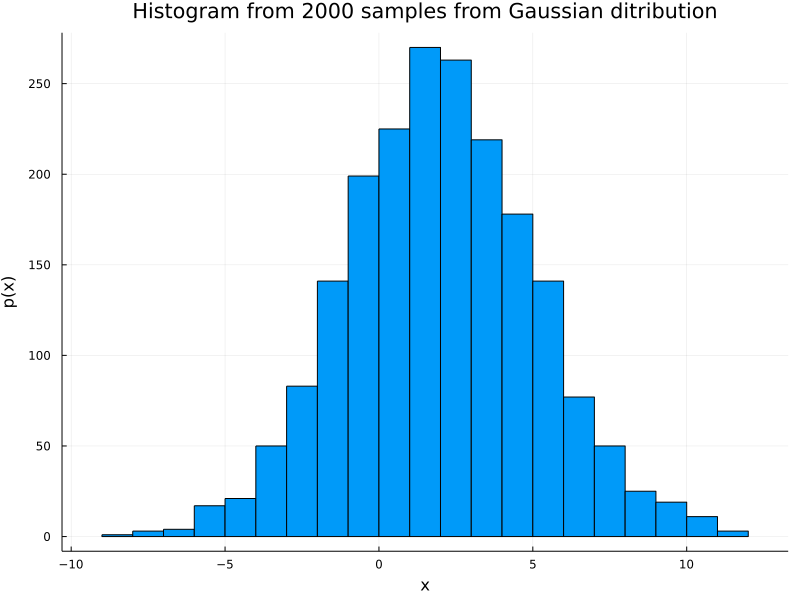

In [49]:
plot(hist,size=(800,600),legend=false)
title!("Histogram from 2000 samples from Gaussian ditribution")
xlabel!("x")
ylabel!("p(x)")

Normalize histogram into PDF

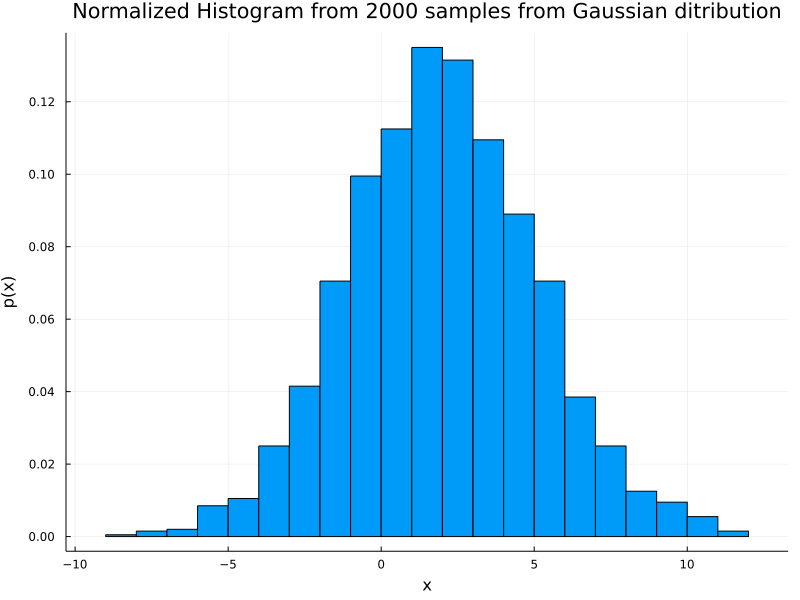

In [48]:
norm_hist = normalize(hist, mode=:pdf)
plot(norm_hist,size=(800,600),legend=false)
title!("Normalized Histogram from 2000 samples from Gaussian ditribution")
xlabel!("x")
ylabel!("p(x)")

Proof that integral = 1

In [18]:
norm(norm_hist) #calculated absolute value of integral of normalized histogram

0.9999999999999997

## 2)

Frequencies for each amino acid sampled from uniform frequency distribution

In [25]:
protein  = rand(range(1,20),300) #take 300 random samples from a uniform distribution of 1:20
aa_symbols =["Ala", "Arg", "Asn", "Asp", "Cys", "Gln", "Glu", "Gly", "His", "Ile", "Leu", "Lys", "Met", "Phe", "Pro", "Ser", "Thr", "Trp", "Tyr", "Val"] #list for symbols for each amino acid
countlist = [count(i->i==x,protein) for x in range(1,20)] #count the amount of observations for each amino acid from sample
freqdict = Dict(aa=>n for (aa,n) in zip(aa_symbols,countlist)) #map amino acid to count

Dict{String, Int64} with 20 entries:
  "Met" => 20
  "Trp" => 17
  "Leu" => 17
  "Gly" => 15
  "Gln" => 17
  "Lys" => 9
  "His" => 9
  "Ala" => 20
  "Pro" => 21
  "Asp" => 10
  "Phe" => 17
  "Cys" => 16
  "Ser" => 10
  "Thr" => 17
  "Glu" => 12
  "Tyr" => 13
  "Val" => 15
  "Ile" => 15
  "Arg" => 19
  "Asn" => 11

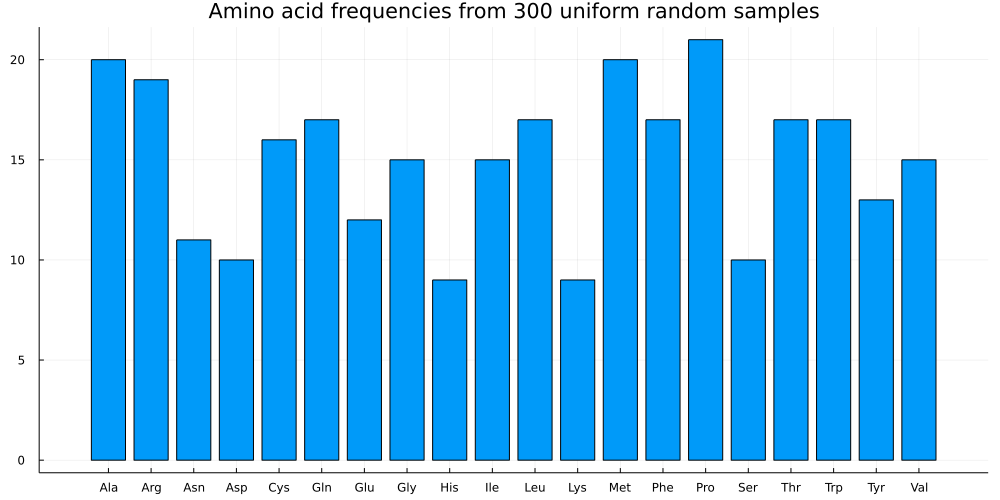

In [41]:
bar(countlist,xticks=(1:20,aa_symbols),size = (1000,500),legend=false)
title!("Amino acid frequencies from 300 uniform random samples")

In [34]:
aa_labels = Dict(zip(aa_symbols,collect(1:20))) #map index to amino acid
res_freqs = FrequencyWeights([8.25,5.53,4.06,5.45,1.37,3.93,6.75,7.07,2.27,5.96,9.66,5.84,2.42,3.86,4.70,6.56,5.34,1.08,2.92,6.87]) #input known residue frequencies
res_freqs = FrequencyWeights([x/100 for x in res_freqs]) #normalize 
cum_res_freqs = accumulate(+,res_freqs) #accumulate for cumulative distribution

20-element Vector{Float64}:
 0.0825
 0.1378
 0.1784
 0.2329
 0.24659999999999999
 0.2859
 0.3534
 0.4241
 0.4468
 0.5064
 0.603
 0.6614
 0.6856
 0.7242
 0.7712
 0.8368
 0.8902
 0.901
 0.9302
 0.9989

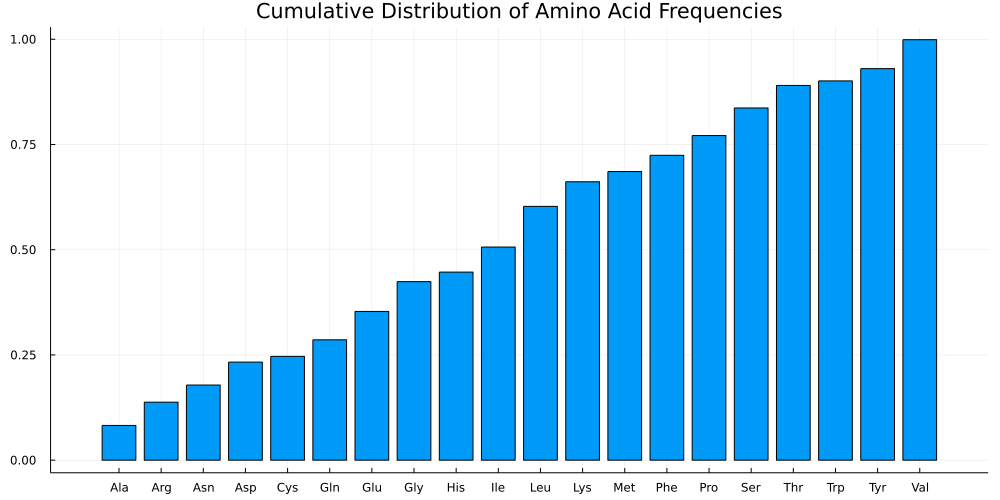

In [40]:
bar(accumulate(+,res_freqs),xticks=(1:20,aa_symbols),size=(1000,500), legend=false)
title!("Cumulative Distribution of Amino Acid Frequencies")

In [91]:
aa_counts = Dict()
for i = collect(1:300)
    aa = sample(aa_symbols,res_freqs)
    aa_counts[aa] = get(aa_counts,aa,0) + 1
end
map!(x->x/3, values(aa_counts))
aa_counts

Dict{Any, Any} with 20 entries:
  "Gln" => 3.66667
  "Ala" => 8.0
  "Cys" => 1.66667
  "Ser" => 8.66667
  "Thr" => 6.33333
  "Glu" => 8.0
  "Tyr" => 4.0
  "Ile" => 5.0
  "Met" => 4.33333
  "Asn" => 2.0
  "Trp" => 1.66667
  "Leu" => 6.33333
  "Gly" => 8.66667
  "Lys" => 4.66667
  "His" => 1.66667
  "Pro" => 4.0
  "Asp" => 4.0
  "Phe" => 4.0
  "Val" => 7.33333
  "Arg" => 6.0

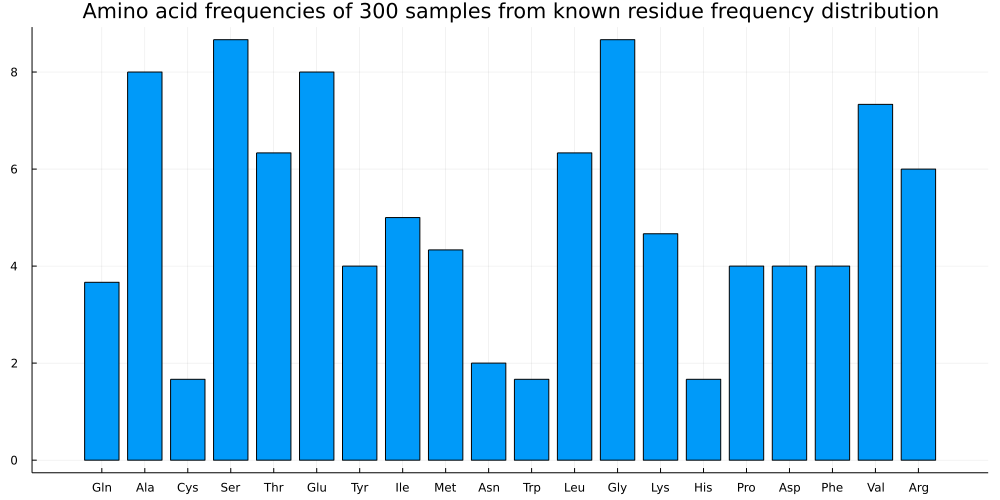

In [93]:
bar(collect(values(aa_counts)),xticks=(1:20,collect(keys(aa_counts))),size=(1000,500),legend=false)
title!("Amino acid frequencies of 300 samples from known residue frequency distribution")

Error between sampled frequencies and known frequencies

In [95]:
ordered_counts = [aa_counts[x] for x in aa_symbols]
norm(ordered_counts-res_freqs)

24.33040067115396

## Monte Carlo

In [ ]:
# 1. choose initial state x
# 2. Generate move from a distribution to a newstate g(x->x') must be reversible otherwise won't be equilibrium
# 3. Accept or reject this move according to some probability that you compare to a URN
# 4. Store new state (either x' or x)
# 5. Forward move in configuration must be equally likely as going back to original state

In [205]:
coords = readdlm("init_crds_boxl_3.5.dat")
lj_df = DataFrame(coords,[:x,:y,:z])

,x,y,z
,Float64,Float64,Float64
1,-1.20196,0.0493745,1.34467
2,0.957627,0.115361,-1.35331
3,-0.188974,0.523728,-1.36514
4,-1.61991,-0.0409586,0.190333
5,1.5412,-0.756257,-1.0001
6,-1.11554,-1.66646,-0.990655
7,-0.703262,-0.135565,-0.212298
8,1.05415,1.37549,-1.37649
9,-0.0243404,0.0902458,0.676829


Calculate PBC distances manually

In [206]:
function calc_distance(x1,x2, periodic, L=3.5)
    dx = x1-x2 
    periodic ? dx - L*round(dx/L) : dx #ternary operator returns output as periodic or not
end

calc_distance (generic function with 2 methods)

In [207]:
#dx_pbc = dx - Lround(dx/L)
function update_R(R, coords,periodic=true)
    for (i,p1) in enumerate(collect(eachrow(coords))[1:29])
        for p2 in collect(eachrow(coords))[i+1:end]
            distance = norm(calc_distance.(p1,p2,periodic))
            push!(R,distance)
        end
    end
end

update_R (generic function with 3 methods)

In [182]:
update_R(coords)

In [183]:
sum(R)

2247.1577897720713

Function to calculate Lennard-Jones Potential for r_ij

In [208]:
function calc_LJ(r)
    4*0.25((1/r)^12 - (1/r)^6)
end

calc_LJ (generic function with 1 method)

Initial PE with PBC

In [209]:
function calc_PE(coords, periodic = true)
    R = []
    update_R(R, coords, periodic)
    sum(calc_LJ,R)
end

calc_PE (generic function with 2 methods)

In [184]:
calc_PE(coords,true)

-29.472115017422297

Initial PE without PBC

In [186]:
calc_PE(coords,false)

-16.403676674238348

## MCMC

Assign Displacement and enforce PBC

In [9]:
d = 0.2
dis_distribution = Uniform(-d/2,d/2) #total d of 
attempted_displacement = rand(dis_distribution,3)

3-element Vector{Float64}:
 -0.02975873161209948
 -0.01013800958392412
 -0.045626339172649716

In [210]:
function assign_displacement(p, distribution)
    pos = coords[p,:]
    attempted_displacement = rand(distribution,3) #get displacement 
    pos+attempted_displacement #attempted new position

    # outs = findall(x->abs(x)>3.5,new_pos)
    # enforce_PBC!.(outs,)
end


assign_displacement (generic function with 2 methods)

In [207]:
assign_displacement(2)

3-element Vector{Float64}:
  0.9428190959910709
  0.09798579008492736
 -1.439207378158627

In [201]:
#accept new poisition if new energy is lower
#if new>old, then generate URN and accept if boltzmann prob (dE) > URN

## Metropolis-Hastings Criterion

In [211]:
function update_pos(coords, PE, kT, d_distribution, particle_idxs)
    p = rand(particle_idxs)
    displaced_p = assign_displacement(p, d_distribution)
    newcoords = copy(coords)
    newcoords[p,:] = displaced_p
    R = []
    newPE = calc_PE(newcoords)
    if newPE > PE
        # println("Original: $(PE)")
        # println("New PE: $(newPE)")
        # println("newPE > PE")
        acc = min(1,exp(-(newPE-PE)/kT))
        urn = randn()
        if acc >= urn
            # println("acc: $(acc) >= urn: $(urn)")
            # println("Accepted")
            return newcoords, newPE
        else
            # println("acc: $(acc) < urn: $(urn)")
            # println("Rejected")
            return coords, PE 
        end
    else
        # println("Original: $(PE)")
        # println("New PE: $(newPE)")
        # println("newPE > PE")
        # println("Accepted")
        return newcoords, newPE 
    end
end

update_pos (generic function with 2 methods)

In [199]:
update_pos(coords,calc_PE(coords),1) 

Original: -29.472115017422297
New PE: -29.576503557833306
newPE < PE
acc: 1.0 >= urn: -0.649003383485658
Accepted


30×3 Matrix{Float64}:
 -1.20196     0.0493745   1.34467
  0.957627    0.115361   -1.35331
 -0.188974    0.523728   -1.36514
 -1.55107     0.0152316   0.234028
  1.5412     -0.756257   -1.0001
 -1.11554    -1.66646    -0.990655
 -0.703262   -0.135565   -0.212298
  1.05415     1.37549    -1.37649
 -0.0243404   0.0902458   0.676829
  0.571014   -0.782855   -1.00928
 -0.757519    1.34517     0.354017
  0.0216686   1.40608    -0.563076
  1.00723    -0.185631    0.947035
  ⋮                      
  1.63863     1.27049    -0.403809
  0.46661     0.851329    1.232
 -0.535853   -1.34941    -0.152944
 -0.873384   -0.600125   -1.29805
  0.921948    0.670061    0.174104
 -1.62967    -1.21268     0.0493156
  0.828193   -1.70892    -0.0266326
 -0.673027    0.970839    1.27244
 -0.578736   -0.710892    1.05739
  1.07961    -0.579293    0.0277402
  1.41042     0.761035    1.3783
  0.163351    0.30274    -0.523787

In [195]:
function testloop()
    y = 1
    for iter in collect(1:10)
        y += iter 
    end
    println(y)
end

testloop (generic function with 1 method)

In [196]:
testloop()

56


## Run simulation

In [212]:
function MCMC(d,kT)
    coords = readdlm("init_crds_boxl_3.5.dat")
    dis_distribution = Uniform(-d/2,d/2)
    particle_idxs = collect(1:30)

    PE = calc_PE(coords) #initial energy of the system
    E_list = []
    for iter in collect(1:100000)
        coords,PE = update_pos(coords, PE, kT, dis_distribution, particle_idxs)
        push!(E_list,PE)
    end
    return mean(E_list)
end
        

MCMC (generic function with 1 method)

In [13]:
MCMC(0.1,1)

-28.228853646756328

In [14]:
MCMC(0.1,0.5)

-28.535511572428973

In [15]:
MCMC(0.1,0.1)

-29.180705860328906

In [17]:
MCMC(0.5,0.1)

473.2351232180578

## 4) Counting and Diffusion

## 5) Harmonic oscillators

In [214]:
@variables x x0 k a m t  

6-element Vector{Num}:
  x
 x0
  k
  a
  m
  t

In [254]:
D = Differential(x)

(::Differential) (generic function with 2 methods)

dU/dx

In [255]:
U = 0.5*k*(x-x0)^2
dU = expand_derivatives(D(U))

0.5k*(2x - 2x0)

0 = -dV/dx - (m*a)

In [249]:
eq1 = 0.5k*(2x-2x0) + (m*a) 

a*m + 0.5k*(2x - 2x0)

Bond equation of motion in terms of x

In [252]:
eq2 = Symbolics.solve_for([eq1],[x])
latexify(eq2)

L"\begin{equation}
\left[
\begin{array}{c}
\frac{k x0 - a m}{k} \\
\end{array}
\right]
\end{equation}
"

function x(t) for bond length as function of time

In [268]:
function h_oscillator(t,x0=1,k=27,m=3)
    x0*cos(√(k/m)*t) + x0
end

h_oscillator (generic function with 4 methods)

Velocity of bond length

In [269]:
Dt = Differential(t)
h_osc = x0*cos(√(k/m)*t) + x0
dx = expand_derivatives(Dt(h_osc))

-x0*sqrt(k / m)*sin(t*sqrt(k / m))

In [277]:
xvals = []
tvals = []
dxvals = []
for ti in collect(0:0.01:10)
    push!(xvals,(h_oscillator(ti)))
    push!(tvals,ti)
    push!(dxvals,Symbolics.value(substitute(dx,Dict(m=>3,k=>27,x0=>1,t=>ti))))
end

Loop through xvals to get -dU/dx

In [278]:
fvals = []
for xi in xvals
    push!(fvals,-Symbolics.value(substitute(dU,Dict(x=>xi,x0=>1,k=>27))))
end

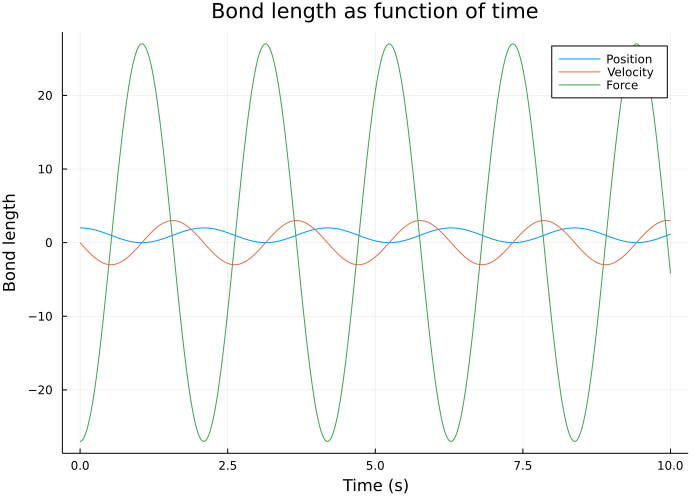

In [285]:
plot(tvals,xvals,size=(700,500),labels="Position")
plot!(tvals,dxvals,labels="Velocity")
plot!(tvals,fvals, labels="Force")
title!("Bond length as function of time")
ylabel!("Bond length")
xlabel!("Time (s)")


In [238]:
Symbolics.value(substitute(dx,Dict(m=>3,k=>27,x0=>1,t=>10)))

2.9640948722785856

In [266]:
xvals

1001-element Vector{Any}:
 2.0
 1.5827536107022249
 1.2271552203094676
 0.9276918132379819
 0.6792035415729605
 0.4768661057111443
 0.3161738546991657
 0.1929235813827349
 0.10319898822768547
 0.04335580040008824
 0.010007503399554585
 1.168322796674115e-5
 0.01045694774562178
 ⋮
 0.9894137257238572
 1.0044928889798124
 1.0195634181604176
 1.0346219055931185
 1.0496649549213117
 1.064689181833876
 1.0796912147885753
 1.0946676957294026
 1.10961528079758
 1.124530641036149
 1.1394104630880648
 1.154251449887584

In [267]:
√(20/5)

2.0